In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data', names=['number', 'content', 'feedback', 'review'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    74682 non-null  int64 
 1   content   74682 non-null  object
 2   feedback  74682 non-null  object
 3   review    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
df['feedback'].value_counts()

,count
feedback,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [5]:
rating_dict = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}
df['stars'] = df['feedback'].apply(lambda x: rating_dict[x])

In [6]:
df.isna().sum()

,0
number,0
content,0
feedback,0
review,686
stars,0


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    73996 non-null  int64 
 1   content   73996 non-null  object
 2   feedback  73996 non-null  object
 3   review    73996 non-null  object
 4   stars     73996 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.4+ MB


<Axes: ylabel='Frequency'>

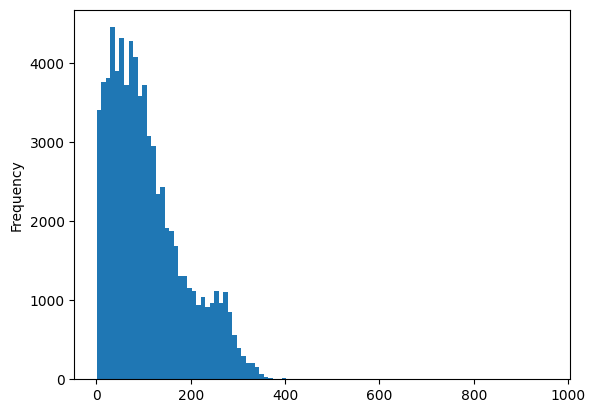

In [8]:
df['length'] = df['review'].str.len()
df['length'].plot(bins=100, kind='hist')

In [9]:
review_as_one =" ".join(df['review'].astype(str).tolist())

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(review_as_one))

In [11]:
reviews_df = df.drop(['number', 'feedback', 'length'], axis=1)

In [12]:
reviews_df['content'].nunique()

32

In [13]:
freq = reviews_df['content'].value_counts(normalize=True)
reviews_df['freq'] = reviews_df['content'].map(freq)

In [14]:
reviews_df = reviews_df.drop('content', axis=1)

In [15]:
import string
import nltk
from nltk.corpus import stopwords

def review_cleaning(review):
    test_punc_removed = [char for char in review if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# df_clean = reviews_df['review'].astype(str).apply(review_cleaning)
# df_clean

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = review_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['review'].astype(str))

In [19]:
reviews_df = reviews_df.drop(['review'], axis=1)
reviews_vector = pd.DataFrame(reviews_countvectorizer.toarray())

In [20]:
reviews_df

,stars,freq
0,1,0.030812
1,1,0.030812
2,1,0.030812
3,1,0.030812
4,1,0.030812
...,...,...
74677,1,0.030691
74678,1,0.030691
74679,1,0.030691
74680,1,0.030691


In [21]:
reviews_vector['stars'] = reviews_df['stars']
reviews_vector['freq'] = reviews_df['freq']

In [ ]:
# reviews_df_new = pd.concat([reviews_df, reviews_vector], axis=1)

In [ ]:
X = reviews_vector.drop(['stars'], axis=1)
y = reviews_vector['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
import pickle

pickle.dump(classifier, open("data", "wb"))